### Step 1: Importing Libraries

In [2]:
#import necessary libraries
import pandas as pd

### Step 2: Loading both datasets


In [3]:
#Loading both "DEMO_J.XPT" and "DPQ_J.XPT" datasets

Depression_data = pd.read_csv("DPQ_J.csv")
Demographic_data  = pd.read_csv("DEMO_J.csv")

In [4]:
Depression_data.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,DPQ100
0,93705.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
1,93706.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
2,93708.0,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,NaN
3,93709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93711.0,1.000000e+00,5.397605e-79,1.000000e+00,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79,5.397605e-79


In [5]:
import numpy as np

cols_phq = ["DPQ010","DPQ020","DPQ030","DPQ040","DPQ050","DPQ060","DPQ070","DPQ080","DPQ090","DPQ100"]

In [6]:
for col in cols_phq:
    print(f"{col}: {Depression_data[col].unique()}\n")

DPQ010: [5.39760535e-79            nan 1.00000000e+00 3.00000000e+00
 2.00000000e+00 7.00000000e+00 9.00000000e+00]

DPQ020: [5.39760535e-79            nan 1.00000000e+00 3.00000000e+00
 2.00000000e+00 9.00000000e+00 7.00000000e+00]

DPQ030: [5.39760535e-79            nan 1.00000000e+00 2.00000000e+00
 3.00000000e+00 9.00000000e+00 7.00000000e+00]

DPQ040: [5.39760535e-79            nan 1.00000000e+00 3.00000000e+00
 2.00000000e+00 9.00000000e+00 7.00000000e+00]

DPQ050: [5.39760535e-79            nan 1.00000000e+00 3.00000000e+00
 2.00000000e+00 9.00000000e+00 7.00000000e+00]

DPQ060: [5.39760535e-79            nan 1.00000000e+00 2.00000000e+00
 9.00000000e+00 3.00000000e+00 7.00000000e+00]

DPQ070: [5.39760535e-79            nan 2.00000000e+00 1.00000000e+00
 3.00000000e+00 9.00000000e+00 7.00000000e+00]

DPQ080: [5.39760535e-79            nan 1.00000000e+00 3.00000000e+00
 9.00000000e+00 2.00000000e+00 7.00000000e+00]

DPQ090: [5.39760535e-79            nan 1.00000000e+00 2.00000000

 ### Step 3: Replacing small floating-point artifacts, such as 5.39e-79, with 0 values for depression screener dataset

I am converting all tiny artifacts to 0's and check whether they are matching with the number of zeroes exactly in website.

In [7]:
# Replacing extremely small float artifacts (like 5e-79) with 0
for col in cols_phq:  # DPQ010–DPQ100 columns
    Depression_data[col] = pd.to_numeric(Depression_data[col], errors="coerce")
    Depression_data.loc[(Depression_data[col].notna()) & (np.isclose(Depression_data[col], 0, atol=1e-20)), col] = 0

### Step 4: Verifying that updated counts matched the official NHANES DPQ_J codebook exactly

In [8]:
for col in cols_phq:
    zeros = (Depression_data[col] == 0).sum()
    total_nonmissing = Depression_data[col].notna().sum()
    total_missing = Depression_data[col].isna().sum()
    print(f"{col}: 0s = {zeros}, total non-missing = {total_nonmissing}, total missing = {total_missing}")

DPQ010: 0s = 3792, total non-missing = 5094, total missing = 439
DPQ020: 0s = 3865, total non-missing = 5093, total missing = 440
DPQ030: 0s = 3119, total non-missing = 5093, total missing = 440
DPQ040: 0s = 2584, total non-missing = 5092, total missing = 441
DPQ050: 0s = 3812, total non-missing = 5092, total missing = 441
DPQ060: 0s = 4237, total non-missing = 5091, total missing = 442
DPQ070: 0s = 4241, total non-missing = 5091, total missing = 442
DPQ080: 0s = 4541, total non-missing = 5091, total missing = 442
DPQ090: 0s = 4893, total non-missing = 5090, total missing = 443
DPQ100: 0s = 2480, total non-missing = 3362, total missing = 2171


**Comments:** The counts now exactly match the values reported in the official DPQ_J codebook.
I am pasting the screenshots for two items (DPQ010 and DPQ020) below as an example to show the alignment.

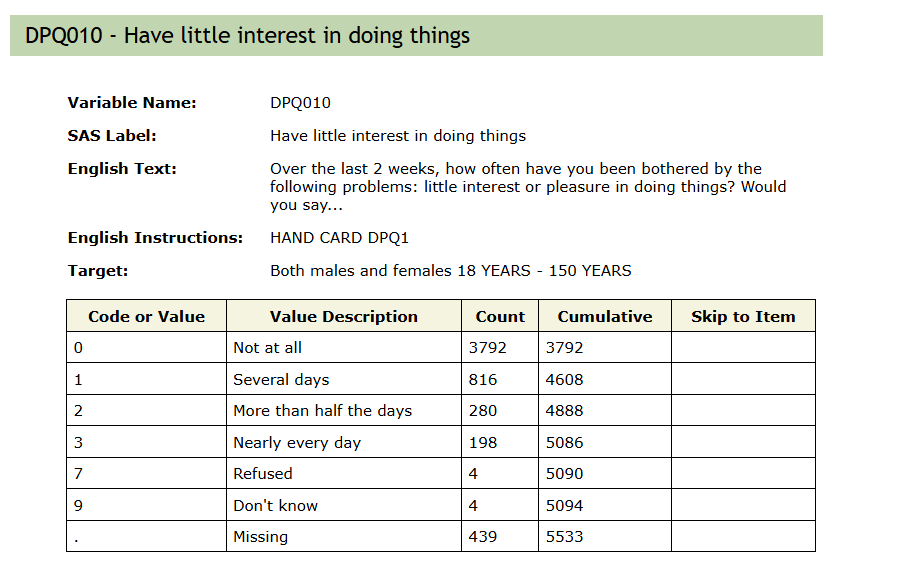

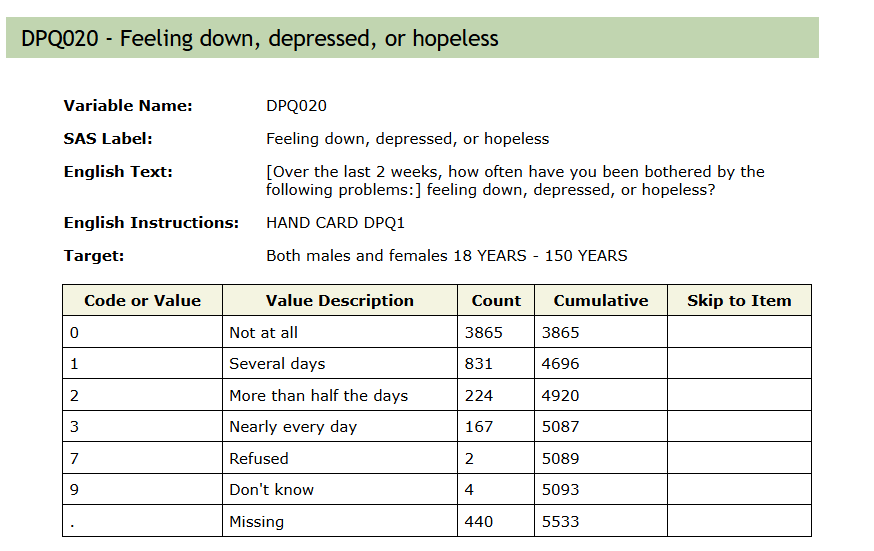

In [9]:
for col in cols_phq:
    print(f"\n{col} value counts:")
    print(Depression_data[col].value_counts(dropna=False))


DPQ010 value counts:
DPQ010
0.0    3792
1.0     816
NaN     439
2.0     280
3.0     198
7.0       4
9.0       4
Name: count, dtype: int64

DPQ020 value counts:
DPQ020
0.0    3865
1.0     831
NaN     440
2.0     224
3.0     167
9.0       4
7.0       2
Name: count, dtype: int64

DPQ030 value counts:
DPQ030
0.0    3119
1.0    1141
3.0     443
NaN     440
2.0     383
9.0       4
7.0       3
Name: count, dtype: int64

DPQ040 value counts:
DPQ040
0.0    2584
1.0    1612
2.0     457
NaN     441
3.0     432
9.0       4
7.0       3
Name: count, dtype: int64

DPQ050 value counts:
DPQ050
0.0    3812
1.0     778
NaN     441
2.0     276
3.0     221
9.0       3
7.0       2
Name: count, dtype: int64

DPQ060 value counts:
DPQ060
0.0    4237
1.0     575
NaN     442
2.0     147
3.0     124
9.0       5
7.0       3
Name: count, dtype: int64

DPQ070 value counts:
DPQ070
0.0    4241
1.0     517
NaN     442
3.0     172
2.0     156
9.0       3
7.0       2
Name: count, dtype: int64

DPQ080 value counts:
DPQ08

In [10]:
for col in cols_phq:
    print(f"{col}: {Depression_data[col].unique()}\n")

DPQ010: [ 0. nan  1.  3.  2.  7.  9.]

DPQ020: [ 0. nan  1.  3.  2.  9.  7.]

DPQ030: [ 0. nan  1.  2.  3.  9.  7.]

DPQ040: [ 0. nan  1.  3.  2.  9.  7.]

DPQ050: [ 0. nan  1.  3.  2.  9.  7.]

DPQ060: [ 0. nan  1.  2.  9.  3.  7.]

DPQ070: [ 0. nan  2.  1.  3.  9.  7.]

DPQ080: [ 0. nan  1.  3.  9.  2.  7.]

DPQ090: [ 0. nan  1.  2.  9.  3.  7.]

DPQ100: [nan  0.  1.  2.  3.  7.  9.]



### Step 5: Ordered Value Counts per PHQ-9 Item

In [11]:
for col in cols_phq:
    print(f"\n{col} value counts (ordered as in the website codebook to keep it alligned):")
    needed_order = [0.0, 1.0, 2.0, 3.0, 7.0, 9.0, np.nan]
    print(Depression_data[col].value_counts(dropna=False).reindex(needed_order))


DPQ010 value counts (ordered as in the website codebook to keep it alligned):
DPQ010
0.0    3792
1.0     816
2.0     280
3.0     198
7.0       4
9.0       4
NaN     439
Name: count, dtype: int64

DPQ020 value counts (ordered as in the website codebook to keep it alligned):
DPQ020
0.0    3865
1.0     831
2.0     224
3.0     167
7.0       2
9.0       4
NaN     440
Name: count, dtype: int64

DPQ030 value counts (ordered as in the website codebook to keep it alligned):
DPQ030
0.0    3119
1.0    1141
2.0     383
3.0     443
7.0       3
9.0       4
NaN     440
Name: count, dtype: int64

DPQ040 value counts (ordered as in the website codebook to keep it alligned):
DPQ040
0.0    2584
1.0    1612
2.0     457
3.0     432
7.0       3
9.0       4
NaN     441
Name: count, dtype: int64

DPQ050 value counts (ordered as in the website codebook to keep it alligned):
DPQ050
0.0    3812
1.0     778
2.0     276
3.0     221
7.0       2
9.0       3
NaN     441
Name: count, dtype: int64

DPQ060 value counts

**Comments:** I used .reindex(order) to make the value counts appear in the specific order that matches the NHANES codebook (0, 1, 2, 3, 7, 9, NaN), instead of the random or frequency-based order pandas gives by default.

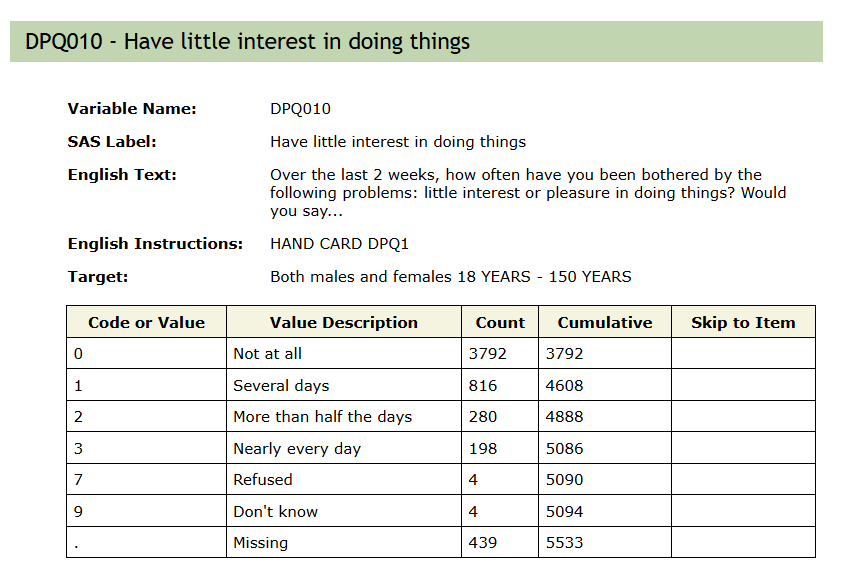

### Step 6: Calculating Count of 7s and 9s per PHQ-9 Question

In [12]:
# Count of 7s and 9s per PHQ-9 question
counts_sevenandnine = pd.DataFrame({
    "7's_count": (Depression_data[cols_phq] == 7).sum(),
    "9's_count": (Depression_data[cols_phq] == 9).sum()
})

counts_sevenandnine["7_or_9_total"] = counts_sevenandnine["7's_count"] + counts_sevenandnine["9's_count"]
counts_sevenandnine

,7's_count,9's_count,7_or_9_total
DPQ010,4,4,8
DPQ020,2,4,6
DPQ030,3,4,7
DPQ040,3,4,7
DPQ050,2,3,5
DPQ060,3,5,8
DPQ070,2,3,5
DPQ080,2,5,7
DPQ090,2,3,5
DPQ100,1,2,3


**Comments:** The above table counts the number of 7s (“Refused”) and 9s (“Don’t know”) recorded for each PHQ-9 question.
A new column, 7_or_9_total, represents the total combined per item, summing non-informative responses which are to be treated later as missing (NaN).

So each row in your table - from DPQ010 to DPQ100 -represents one question about the PHQ-9 survey. And each of those "7_or_9_total" values - 8, 6, 7 etc.. represent the number of people that refused or skipped that question.

DPQ010 → 8 participants skipped/refused

DPQ020 → 6 participants skipped/refused

DPQ030 → 7 participants skipped/refused

DPQ040 → 7 participants skipped/refused

DPQ050 → 5 participants skipped/refused

DPQ060 → 8 Participants skipped/refused

DPQ070 → 5 participants skipped/refused

DPQ080 → 7 participants skipped/refused

DPQ090 → 5 participants skipped/refused

DPQ100 → 3 participants skipped/refused

Adding up those totals, you get 8 + 6 + 7 + 7 + 5 + 8 + 5 + 7 + 5 + 3 ≈ 61 or 62 total “non-answers.” This means that over the nine questions combined, there are 62 total missing/refused responses.

This helps quantify how many participants skipped or refused each question before those values are replaced with NaN for analysis.

### Step 7: Finding Participants with at Least One 7 or 9 Response

In [13]:
# Total number of participants with at least one 7 or 9 response
uniqueparticipants_with_7or9 = Depression_data[cols_phq].isin([7, 9]).any(axis=1).sum()
print(f"Unique Participants with at least one 7 or 9 response: {uniqueparticipants_with_7or9}")

Unique Participants with at least one 7 or 9 response: 26


**Comments:** This indicates how many unique participants gave a response coded 7 or 9 to at least one of the nine PHQ-9 items.
The result, 26 participants, reflects how many will have at least one missing value once these codes are replaced with NaN in the cleaned dataset.

### Step 8: Converting 7s and 9s to NaN for analysis:

In [14]:
# Replacing 7s and 9s with NaN for further analysis
Depression_data[cols_phq] = Depression_data[cols_phq].replace([7, 9], np.nan)

The above step shows all 7s and 9s were converted to NaN to avoid influencing further statistical analyses

In [15]:
Demographic_data.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93703.0,10.0,2.0,2.0,2.0,NaN,5.0,6.0,2.0,27.0,...,3.0,1.0,3.0,9246.491865,8539.731348,2.0,145.0,15.0,15.0,5.00
1,93704.0,10.0,2.0,1.0,2.0,NaN,3.0,3.0,1.0,33.0,...,3.0,1.0,2.0,37338.768343,42566.614750,1.0,143.0,15.0,15.0,5.00
2,93705.0,10.0,2.0,2.0,66.0,NaN,4.0,4.0,2.0,NaN,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
3,93706.0,10.0,2.0,1.0,18.0,NaN,5.0,6.0,2.0,222.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
4,93707.0,10.0,2.0,1.0,13.0,NaN,5.0,7.0,2.0,158.0,...,2.0,1.0,3.0,6769.344567,7064.609730,1.0,138.0,10.0,10.0,1.88


###Step 9: Checking uniqueness of SEQN in both

In [16]:
print("Unique IDs in DPQ_J :", Depression_data['SEQN'].is_unique)
print("Unique IDs in DEMO_J:", Demographic_data['SEQN'].is_unique)

#counting duplicates explicitly
print("Duplicate IDs in DPQ_J:", Depression_data['SEQN'].duplicated().sum())
print("Duplicate IDs in DEMO_J:", Demographic_data['SEQN'].duplicated().sum())

Unique IDs in DPQ_J : True
Unique IDs in DEMO_J: True
Duplicate IDs in DPQ_J: 0
Duplicate IDs in DEMO_J: 0


**Comments:** The SEQN variable (Respondent Sequence Number) is the unique number linking participants across NHANES components.

Uniqueness was established in both the depression screener (**DPQ_J**) and depression (**DEMO_J**) data sets with is_unique and duplicated() tests.

Results confirmed that each participant appears only once in each dataset (is_unique = True), validating SEQN as a reliable key for merging in step two.

### Step 10: Merging both data sets on SEQN using Inner join


In [17]:
merged_data = pd.merge(Depression_data, Demographic_data, on='SEQN', how='inner')

### Step 11: Checking shapes before and after merge

In [18]:
print("Shape of DEMO_J:", Demographic_data.shape)
print("Shape of DPQ_J:", Depression_data.shape)
print("Shape of Merged data:", merged_data.shape)

Shape of DEMO_J: (9254, 46)
Shape of DPQ_J: (5533, 11)
Shape of Merged data: (5533, 56)


The merged data set contains 5533 participants and 56 columns as SEQN is the common coloumn in both datasets.

### Step 12: Previewing merged file

In [19]:
merged_data.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
1,93706.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
2,93708.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63
3,93709.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,12043.388271,12277.556662,1.0,136.0,2.0,2.0,0.41
4,93711.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,3.0,11178.260106,12390.919724,2.0,134.0,15.0,15.0,5.00


**Comments:** The demographic file (DEMO_J) included 9,254 participants, and the depression screener Questionnaire file(DPQ_J) included 5,533 participants who responded to the PHQ-9.

After performing an inner join on SEQN, the merged dataset still had 5,533 participants which are individuals who provided both demographic and mental health information.

This is consistent with the NHANES design, in which a portion of all those interviewed will complete each of the modules of questionnaires.

In [20]:
merged_data["SEQN"] = pd.to_numeric(merged_data["SEQN"], errors="coerce").astype("Int64")

In [21]:
merged_data["SEQN"]

,SEQN
0,93705
1,93706
2,93708
3,93709
4,93711
...,...
5528,102949
5529,102952
5530,102953
5531,102954


The SEQN variable was coerced to numeric and converted to Int64 to correct floating-point artifacts introduced during file conversion.

In [22]:
#again previewing to see SEQN whether changed to Int from Float
merged_data.head()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,...,DMDHREDZ,DMDHRMAZ,DMDHSEDZ,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,93705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,NaN,8614.571172,8338.419786,2.0,145.0,3.0,3.0,0.82
1,93706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,2.0,8548.632619,8723.439814,2.0,134.0,NaN,NaN,NaN
2,93708,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,13329.450589,14372.488765,2.0,138.0,6.0,6.0,1.63
3,93709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,NaN,12043.388271,12277.556662,1.0,136.0,2.0,2.0,0.41
4,93711,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,1.0,3.0,11178.260106,12390.919724,2.0,134.0,15.0,15.0,5.00


In [23]:
for col in cols_phq:
    print(f"{col}: {merged_data[col].unique()}\n")

DPQ010: [ 0. nan  1.  3.  2.]

DPQ020: [ 0. nan  1.  3.  2.]

DPQ030: [ 0. nan  1.  2.  3.]

DPQ040: [ 0. nan  1.  3.  2.]

DPQ050: [ 0. nan  1.  3.  2.]

DPQ060: [ 0. nan  1.  2.  3.]

DPQ070: [ 0. nan  2.  1.  3.]

DPQ080: [ 0. nan  1.  3.  2.]

DPQ090: [ 0. nan  1.  2.  3.]

DPQ100: [nan  0.  1.  2.  3.]



In [24]:
#Checking whether these columns are numeric or not
from pandas.api.types import is_numeric_dtype
for column in cols_phq:
    print(column, "is numeric:", is_numeric_dtype(merged_data[column]))

DPQ010 is numeric: True
DPQ020 is numeric: True
DPQ030 is numeric: True
DPQ040 is numeric: True
DPQ050 is numeric: True
DPQ060 is numeric: True
DPQ070 is numeric: True
DPQ080 is numeric: True
DPQ090 is numeric: True
DPQ100 is numeric: True
